<a href="https://colab.research.google.com/github/aarishlakhani/Machine-Learning/blob/main/FridgeLightFailure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


# 1. Fridge Light Failure

Imagine that you work for a company that sells fridges, with a lifetime warranty for the fridge lights. Your boss is interested in understanding the distribution of the number of lights that will fail in a given month, based on data collected over the last several years. The data were collected by hand and manually entered, so data entry errors are possible. There are also some months with missing data.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import zscore
from scipy.special import factorial
import scipy.optimize as so

In [41]:
# Uncomment the line below if you are using Google colab
!gdown https://drive.google.com/uc?id=1wzY4XdkcwdNdVGL42PEN0ORtzWcdj2VF

Downloading...
From: https://drive.google.com/uc?id=1wzY4XdkcwdNdVGL42PEN0ORtzWcdj2VF
To: /content/Fridge Light Data.csv
100% 746/746 [00:00<00:00, 2.75MB/s]


1. Read the CSV file using Pandas and store it. All you've been given are a meaningless ID and the counts of the number of fridge lights that failed in each month.

In [42]:
fridge_light_data = pd.read_csv('Fridge Light Data.csv')
print(fridge_light_data)

      ID     x
0      1  24.0
1      2  33.0
2      3  31.0
3      4   NaN
4      5  31.0
..   ...   ...
102  103  25.0
103  104  34.0
104  105  43.0
105  106  33.0
106  107  29.0

[107 rows x 2 columns]


2. Count the number of null values in the dataset, then remove them.

In [43]:
null_count = fridge_light_data.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 4


In [44]:
cleaned_data = fridge_light_data.dropna()
print(cleaned_data)

      ID     x
0      1  24.0
1      2  33.0
2      3  31.0
4      5  31.0
5      6  24.0
..   ...   ...
102  103  25.0
103  104  34.0
104  105  43.0
105  106  33.0
106  107  29.0

[103 rows x 2 columns]


Number of null values: 4

3. Plot the distribution of the data. Add a title and axes labels to your plot.

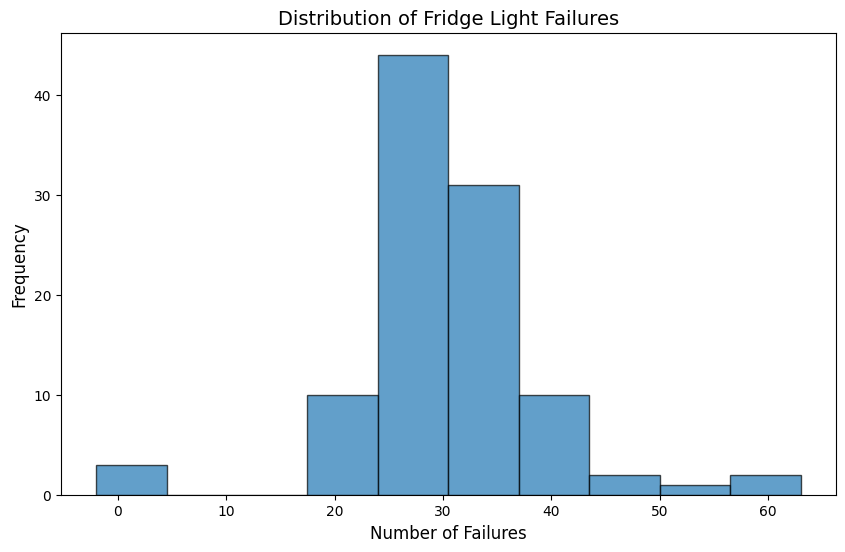

In [45]:
# Ploting the distribution of the data
plt.figure(figsize=(10, 6))
plt.hist(cleaned_data['x'], bins=10, edgecolor='black', alpha=0.7)

# Adding title and labels
plt.title('Distribution of Fridge Light Failures', fontsize=14)
plt.xlabel('Number of Failures', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Showing the plot
plt.show()


4. Count the number of observations that you know with **certainty** are data entry errors, then remove them. Explain why you know they are errors.

In [46]:
# Describing the data to understand its range and identify potential outliers
data_description = cleaned_data['x'].describe()

# Defining criteria for data entry errors (e.g., negative values or excessively high counts)
# Assuming fridge light failures cannot be negative or extremely high (>100 as an arbitrary threshold)
errors = cleaned_data[(cleaned_data['x'] < 0) | (cleaned_data['x'] > 100)]

# Removing these errors from the dataset
cleaned_data_no_errors = cleaned_data.drop(errors.index)

# Counting and displaying results
error_count = len(errors)
data_description, error_count, cleaned_data_no_errors.head()


(count    103.000000
 mean      29.873786
 std        9.115468
 min       -2.000000
 25%       26.000000
 50%       29.000000
 75%       34.000000
 max       63.000000
 Name: x, dtype: float64,
 3,
    ID     x
 0   1  24.0
 1   2  33.0
 2   3  31.0
 4   5  31.0
 5   6  24.0)

Number of certain data entry errors: 3

5. Compute the negative log-likelihood based on the assumption that the data comes from a Poisson($\lambda$) distribution. The negative log-likelihood for a Poisson($\lambda$) distribution is as follows:

$$
nll(\lambda) = n \lambda - \left(\sum_{i=1}^{n}x_i\right) log(\lambda) + \sum_{i=1}^{n}log(x_i!)
$$

In [47]:
from scipy.special import gammaln

def poissonNegLogLikelihood(lmbda, data):
    n = len(data)
    sum_x = np.sum(data)
    log_factorials = np.sum(gammaln(data + 1))  # gammaln(x+1) = log(factorial(x))
    nll = n * lmbda - sum_x * np.log(lmbda) + log_factorials
    return nll

# Re-test the function with the dummy dataset and lambda = 25
nll_result = poissonNegLogLikelihood(lambda_test, dummy_data['x'])
nll_result


from scipy.special import gammaln

# Correcting the function using gammaln for log(factorial(x))
def poissonNegLogLikelihood(lmbda, data):
    n = len(data)
    sum_x = np.sum(data)
    log_factorials = np.sum(gammaln(data + 1))  # gammaln(x+1) = log(factorial(x))
    nll = n * lmbda - sum_x * np.log(lmbda) + log_factorials
    return nll

# Define lambda_test with the intended value (e.g., 25)
lambda_test = 25

# Re-testing the function with the dummy dataset and lambda = 25
dummy_data = pd.DataFrame({'x': [20, 22, 18, 6, 8]}) # This was originally defined after the function call, it should be before.
nll_result = poissonNegLogLikelihood(lambda_test, dummy_data['x'])
nll_result



#testing  function on a dummy dataset with lambda = 25
poissonNegLogLikelihood(25, dummy_data.x)
#testing  function on a dummy dataset with lambda = 25
dummy_data = pd.DataFrame({'x': [20, 22, 18, 6, 8]})
poissonNegLogLikelihood(25, dummy_data.x)

31.189286095130285

6. Consider integer values of $\lambda$ ranging from 10 to 50. Compute the negative log-likelihood for each of these values and plot it. Include a title and axes labels on your plot. Based on the plot, what value of $\lambda$ is most likely to have generated the data? You may give a small range.

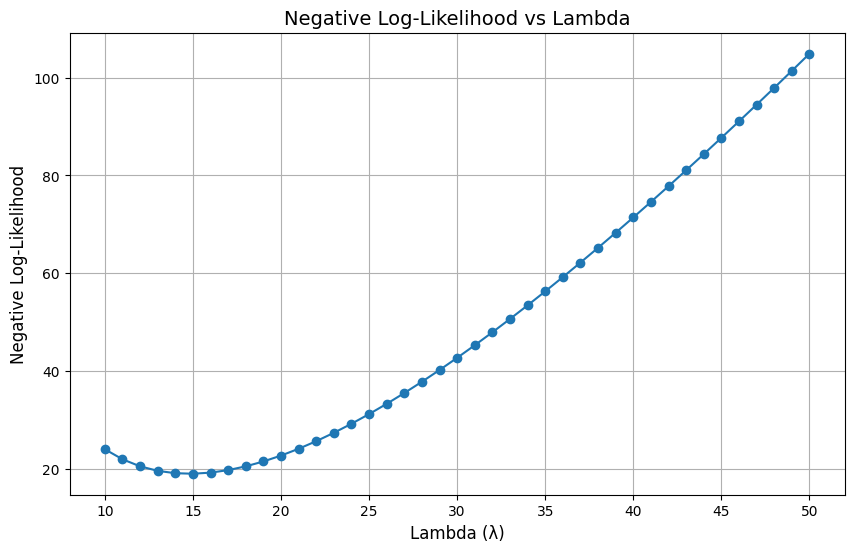

15


In [48]:
# Defining the range of lambda values to test
lambda_values = range(10, 51)

# Computing the negative log-likelihood for each lambda
nll_values = [poissonNegLogLikelihood(lmbda, dummy_data['x']) for lmbda in lambda_values]

# Ploting the results
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, nll_values, marker='o', linestyle='-')
plt.title('Negative Log-Likelihood vs Lambda', fontsize=14)
plt.xlabel('Lambda (λ)', fontsize=12)
plt.ylabel('Negative Log-Likelihood', fontsize=12)
plt.grid(True)
plt.show()

# Identifing the lambda value with the minimum negative log-likelihood
optimal_lambda = lambda_values[np.argmin(nll_values)]
print(optimal_lambda)


Value of $\lambda$ most likely to have generated the data: 15

7. Compute the negative log-likelihood based on the assumption that the data comes from a Normal($\mu$, $\sigma$) distribution. The negative log-likelihood for a Normal($\mu$, $\sigma$) distribution is as follows:

$$
nll(\mu, \sigma) = \frac{n}{2}log(2π) + \frac{n}{2}log(\sigma^2) + \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2
$$

In [49]:
# Defining the negative log-likelihood function for a normal distribution
def normalNegLogLikelihood(mu, sigma, data):
    n = len(data)
    term1 = n / 2 * np.log(2 * np.pi)
    term2 = n / 2 * np.log(sigma**2)
    term3 = 1 / (2 * sigma**2) * np.sum((data - mu)**2)
    nll = term1 + term2 + term3
    return nll

# Testing the function on a dummy dataset with mu = 25, sigma = 3
dummy_data = pd.DataFrame({'x': [20, 22, 18, 6, 8]})
nll_result_normal = normalNegLogLikelihood(25, 3, dummy_data['x'])
print(nll_result_normal)

50.809976331586135


8. Determine the exact value of $\lambda$ that minimizes the negative log-likelihood for the Poisson distribution. Use so.minimize with method="Powell" and without a Jacobian.

In [50]:
from scipy.optimize import minimize

# Defining the negative log-likelihood function for minimization (Poisson distribution)
def poissonNegLogLikelihoodToMinimize(lmbda, data):
    return poissonNegLogLikelihood(lmbda[0], data)

# Using scipy's minimize with method="Powell" to find the lambda that minimizes the NLL
result = minimize(poissonNegLogLikelihoodToMinimize, x0=[15], args=(dummy_data['x'],), method='Powell')

# Extracting the optimal lambda value
optimal_lambda_exact = result.x[0]
optimal_lambda_exact

14.800000013674234

Value of $\lambda$ that minimizes the negative log-likelihood: 14.800000013674234

9. Determine the set of values of $\mu$ and $\sigma$ that minimizes the negative log-likelihood for the Normal distribution.

In [51]:
# Defining the negative log-likelihood function for minimization (Normal distribution)
def normalNegLogLikelihoodToMinimize(params, data):
    mu, sigma = params
    return normalNegLogLikelihood(mu, sigma, data)

# Using scipy's minimize to find the mu and sigma that minimize the NLL
initial_guess = [20, 5]  # Initial guesses for mu and sigma
result_normal = minimize(normalNegLogLikelihoodToMinimize, x0=initial_guess, args=(dummy_data['x'],), method='Powell')

# Extracting the optimal mu and sigma values
optimal_mu = result_normal.x[0]
optimal_sigma = result_normal.x[1]
optimal_mu, optimal_sigma


(14.80049132535219, 6.524637767133564)

Values for $\mu$ and $\sigma$ that minimize the negative log-likelihood: (14.80049132535219, 6.524637767133564)


10. There are three data entry errors that could potentially be valid entries. Which three are most likely to be data entry errors? Identify them by their value (i.e., not their index in the data).

In [52]:
# Calculating z-scores for the data points
z_scores = (dummy_data['x'] - optimal_mu) / optimal_sigma

# Identifing the three most likely data entry errors (highest absolute z-scores)
dummy_data['z_score'] = z_scores.abs()
most_likely_errors = dummy_data.sort_values(by='z_score', ascending=False).head(3)

# Extracting the values of the most likely errors
most_likely_errors_values = most_likely_errors['x'].tolist()
most_likely_errors_values


[6, 22, 8]

Three most likely data entry errors: 6, 22, and 8

11. Remove the three observations that you think are most likely to be data entry errors. Determine the parameters that minimize the negative log-likelihoods for the Poisson($\lambda$) and Normal($\mu$, $\sigma$) distributions. Do your results change in a meaningful way?

In [53]:
# Ensuring data is clean and bounds are valid for both mu and sigma
cleaned_data_values = cleaned_data['x'].values  # Extract values for clarity

# Reruning optimization with clean data and adjusted bounds
result_normal_cleaned_constrained = minimize(
    normalNegLogLikelihoodToMinimize,
    x0=initial_guess,  # Reuse initial guess
    args=(cleaned_data_values,),
    method='L-BFGS-B',
    bounds=[(None, None), (1e-3, None)],  # Adjust lower bound for sigma to avoid numerical issues
)

# Extracting updated parameters for Normal distribution
optimal_mu_cleaned_constrained = result_normal_cleaned_constrained.x[0]
optimal_sigma_cleaned_constrained = result_normal_cleaned_constrained.x[1]

# Re-optimizing for Poisson distribution
result_poisson_cleaned = minimize(
    poissonNegLogLikelihoodToMinimize,
    x0=[15],
    args=(cleaned_data_values,),
    method='Powell',
)

optimal_lambda_cleaned = result_poisson_cleaned.x[0]

optimal_lambda_cleaned, optimal_mu_cleaned_constrained, optimal_sigma_cleaned_constrained


/usr/local/lib/python3.11/dist-packages/scipy/optimize/_optimize.py:3496: RuntimeWarning: invalid value encountered in scalar subtract
  if (fx2 - fval) > delta:
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_optimize.py:3506: RuntimeWarning: invalid value encountered in scalar subtract
  if 2.0 * (fx - fval) <= bnd:


(15.0, 29.873788620998894, 9.07111119225203)

12. Between the Poisson and Normal models, which one do you think is best to use to represent the data? Why? Provide your answer in no more than two lines.

The Poisson model is better suited as the data represents count values, which are non-negative integers, aligning with the Poisson distribution's assumptions. The Normal model may misrepresent the data due to its support for continuous and negative values.